In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("vaaree_data.db")
query = "SELECT * FROM products " 
df = pd.read_sql(query, conn)
conn.close()
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  192 non-null    int64 
 1   Product_Name        192 non-null    object
 2   Material            192 non-null    object
 3   Price               192 non-null    int64 
 4   Product_Page        192 non-null    object
 5   MRP_Rate            192 non-null    int64 
 6   Offer               192 non-null    int64 
 7   Estimated_Delivery  192 non-null    object
 8   Category            192 non-null    object
 9   Rating              192 non-null    int64 
 10  Reviews             192 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 16.6+ KB


,ID,Product_Name,Material,Price,Product_Page,MRP_Rate,Offer,Estimated_Delivery,Category,Rating,Reviews
0,1388,Bloom Blush Planter - Set Of Two,Metal,799,https://vaaree.com/products/bloom-blush-plante...,2999,74,2025-03-10,Artificial Flowers & Plants,0,5
1,4099,(Coffee & White) Faux Pampas Grass Sticks (45....,Plastic,899,https://vaaree.com/products/faux-pampas-grass-...,3200,72,2025-03-10,Artificial Flowers & Plants,4,1
2,7283,Faux Realistic Bougainvillea Flower Stick - Pu...,Fabric,599,https://vaaree.com/products/faux-realistic-bou...,699,15,2025-03-03,Artificial Flowers & Plants,5,3
3,3552,Faux Tropic Anthurium Silk Plant With Pot - 2....,Pvc,959,https://vaaree.com/products/faux-tropic-anthur...,1750,46,2025-03-03,Artificial Flowers & Plants,3,3
4,4778,Goldo Glamour Planter - Set Of Two,Metal,699,https://vaaree.com/products/goldo-glamour-plan...,2699,75,2025-03-10,Artificial Flowers & Plants,0,3
...,...,...,...,...,...,...,...,...,...,...,...
187,9751,Memories To Rejoice Photo Frames (White) - Set...,Acrylic Wood,1335,https://vaaree.com/products/memories-to-rejoic...,4197,69,2025-03-10,Wall Decor,0,0
188,6572,Mayoora Regal Wall Art,Wood,899,https://vaaree.com/products/mayoora-regal-wall...,5000,82,2025-03-10,Wall Decor,1,1
189,4734,Hibiscus Bloom Wall Painting - Set Of Two,Canvas,1608,https://vaaree.com/products/hibiscus-bloom-wal...,5000,68,2025-03-10,Wall Decor,0,6
190,6408,Calm Buddha Wall Painting,Canvas,902,https://vaaree.com/products/calm-buddha-wall-p...,5000,82,2025-03-10,Wall Decor,0,2


In [2]:
import os
from lets_plot import ggsave, ggplot
save_path = r"D:\\dtproject\\Docs"
os.makedirs(save_path, exist_ok=True)

In [3]:
from lets_plot import *
LetsPlot.setup_html()


plot1 = ggplot(df, aes(x='Category', y='Price', fill='Offer')) + \
        geom_boxplot() + \
        ggtitle("Price vs. Offer Percent Across Categories") + \
        xlab("Category") + ylab("Price") + \
        theme_minimal() + \
        theme(axis_text_x=element_text(angle=45, hjust=1))

# Rating vs. Offer Percent
plot2 = ggplot(df, aes(x='Rating', y='Offer', fill='Rating')) + \
        geom_boxplot() + \
        ggtitle("Rating vs. Offer Percent") + \
        xlab("Rating") + ylab("Offer Percentage") + \
        theme_minimal()

# Price Distribution by Category
plot3 = ggplot(df, aes(x='Category', y='Price', fill='Category')) + \
        geom_boxplot() + \
        ggtitle("Price Distribution Across Categories") + \
        xlab("Category") + ylab("Price") + \
        theme_minimal() + coord_flip()

# Material Distribution Across Categories
plot4 = ggplot(df, aes(x='Category', fill='Material')) + \
        geom_bar() + \
        ggtitle("Material Distribution Across Categories") + \
        xlab("Category") + ylab("Count") + \
        theme_minimal() + theme(axis_text_x=element_text(angle=45, hjust=1))

# Offer Percentage Distribution
plot5 = ggplot(df, aes(x='Offer')) + \
        geom_histogram(binwidth=5, fill='blue', color='black') + \
        ggtitle("Distribution of Offer Percentage") + \
        xlab("Offer Percentage") + ylab("Number of produts") + \
        theme_minimal()

plot5.show()
ggsave(plot5, filename=os.path.join(save_path, "Distribution of Offer Percentag.svg"),
       path=save_path, dpi=300)


'D:\\dtproject\\Docs\\Distribution of Offer Percentag.svg'

In [4]:
import pandas as pd
import numpy as np
from lets_plot import *
LetsPlot.setup_html()

# ------------------------ 2. Price vs. Offer Analysis ------------------------
scatter_plot = (
    ggplot(df, aes(x='Price', y='Offer', color='Category', size='Reviews')) +
    geom_point(alpha=0.7) +
    scale_size(range=[2, 10]) +
    ggtitle('Price vs. Offer Analysis') +
    xlab('Price') +
    ylab('Offer (%)') +
    theme_minimal()
)
scatter_plot.show()
ggsave(scatter_plot, filename=os.path.join(save_path, " Price vs. Offer Analysis.svg"),
       path=save_path, dpi=300)



# ------------------------ 3. Material Distribution in Categories ------------------------
material_counts = df.groupby(['Category', 'Material']).size().reset_index(name='count')
bar_plot = (
    ggplot(material_counts, aes(x='Category', y='count', fill='Material')) +
    geom_bar(stat='identity', position='stack') +
    ggtitle('Material Distribution Across Categories') +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)
bar_plot.show()

ggsave(bar_plot, filename=os.path.join(save_path, "Material Distribution Across Categories.svg"),
       path=save_path)

best_deals = df[(df['Price'] < df['Price'].median()) & 
                (df['Offer'] > df['Offer'].median()) & 
                (df['Rating'] > df['Rating'].median())&
                (df['Material'].notna())]

best_deals = best_deals.sort_values(by=['Offer', 'Rating'], ascending=[False, False]).head(10)
best_deals_plot = (
    ggplot(best_deals, aes(x='Offer', y='Product_Name', fill='Offer')) +
    geom_bar(stat='identity') +
    scale_fill_gradient(low='lightblue', high='darkblue') +
    ggtitle('Top 10 Best Deals') +
    xlab('Offer (%)') +
    ylab('')
)
best_deals_plot.show()
ggsave(best_deals_plot, filename=os.path.join(save_path, "Top 10 Best Deals.svg"),
       path=save_path)


'D:\\dtproject\\Docs\\Top 10 Best Deals.svg'

In [5]:
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()


df['Estimated_Delivery'] = pd.to_datetime(df['Estimated_Delivery'], errors='coerce')


latest_scrape_date = df['Estimated_Delivery'].min()


df['Delivery_Days'] = (df['Estimated_Delivery'] - latest_scrape_date).dt.days


df = df[df['Delivery_Days'] >= 0]


p1 = (ggplot(df, aes(x='Estimated_Delivery')) +
      geom_bar(fill='blue', alpha=0.7) +
      labs(title='Number of Deliveries Per Day', x='Estimated Delivery Date', y='Count') +
      theme(axis_text_x=element_text(angle=45, hjust=1)))



p3 = (ggplot(df, aes(x='Estimated_Delivery', y='Price', color='Category')) +
      geom_point(alpha=0.7) +
      labs(title='Price vs. Estimated Delivery Date', x='Estimated Delivery Date', y='Price'))




display(p1)
ggsave(p1, filename=os.path.join(save_path, "Number of Deliveries Per Day.svg"),
       path=save_path)

display(p3)
ggsave(p3, filename=os.path.join(save_path, "Price vs. Estimated Delivery Date.svg"),
       path=save_path)



'D:\\dtproject\\Docs\\Price vs. Estimated Delivery Date.svg'

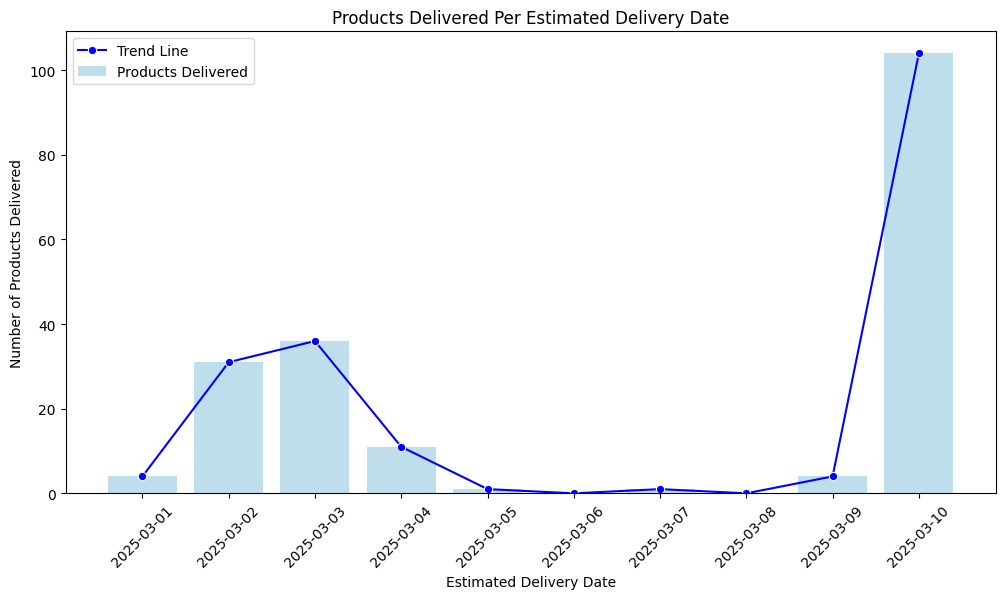

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df["Estimated_Delivery"] = pd.to_datetime(df["Estimated_Delivery"], errors="coerce")
delivery_counts = df["Estimated_Delivery"].value_counts().sort_index()
date_range = pd.date_range(start=df["Estimated_Delivery"].min(), end=df["Estimated_Delivery"].max())
delivery_counts = delivery_counts.reindex(date_range, fill_value=0)
delivery_counts.index = delivery_counts.index.strftime('%Y-%m-%d')


plt.figure(figsize=(12, 6))
sns.barplot(x=delivery_counts.index, y=delivery_counts.values, color="skyblue", alpha=0.6, label="Products Delivered")
sns.lineplot(x=delivery_counts.index, y=delivery_counts.values, marker="o", color="blue", label="Trend Line")


plt.xlabel("Estimated Delivery Date")
plt.ylabel("Number of Products Delivered")
plt.title("Products Delivered Per Estimated Delivery Date")
plt.xticks(rotation=45)
plt.legend()

plt.show()


In [7]:
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

# Compute Offer Percentage
df['Offer_Percent'] = ((df['MRP_Rate'] - df['Price']) / df['MRP_Rate']) * 100

# 🔹 Best Deals: Low Price, High Discount, High Rating
best_deals = df[(df['Price'] < df['Price'].median()) & 
                (df['Offer_Percent'] > df['Offer_Percent'].median()) & 
                (df['Rating'] > df['Rating'].median())]

best_deals = best_deals.sort_values(by=['Offer_Percent', 'Rating'], ascending=[False, False]).head(10)

# 🔹 Overpriced Items: High MRP, Low Offer, Low Reviews
overpriced_items = df[(df['MRP_Rate'] > df['MRP_Rate'].median()) & 
                      (df['Offer_Percent'] < df['Offer_Percent'].median()) & 
                      (df['Reviews'] < df['Reviews'].median())]

overpriced_items = overpriced_items.sort_values(by=['MRP_Rate', 'Offer_Percent', 'Reviews'], ascending=[False, True, True]).head(10)

# Ensure Product_Name is sorted manually
best_deals = best_deals.sort_values(by='Offer_Percent', ascending=True)
overpriced_items = overpriced_items.sort_values(by='MRP_Rate', ascending=False)


p1 = (ggplot(best_deals, aes(x='Product_Name', y='Offer_Percent', fill='Category')) +
      geom_bar(stat='identity') +
      coord_flip() +
      ggtitle("🔥 Top 10 Best Deals: High Discount & Ratings") +
      xlab("Product") + ylab("Offer Percentage (%)") +
      theme_minimal() +
      ggsize(800, 500))  # Adjusted size


p2 = (ggplot(best_deals, aes(x='Price', y='Rating', color='Offer_Percent')) +
      geom_point(size=4, alpha=0.8) +
      scale_color_gradient(low='blue', high='red') +
      ggtitle("💰 Best Deals: Price vs. Rating (Color = Offer %)") +
      xlab("Price") + ylab("Rating") +
      theme_minimal() +
      ggsize(700, 500))  # Adjusted size


p3 = (ggplot(overpriced_items, aes(x='Product_Name', y='MRP_Rate', fill='Category')) +
      geom_bar(stat='identity') +
      coord_flip() +
      ggtitle("⚠️ Top 10 Overpriced Items: High MRP & Low Offer") +
      xlab("Product") + ylab("MRP Rate") +
      theme_minimal() +
      ggsize(800, 500))  # Adjusted size


p4 = (ggplot(overpriced_items) +
      geom_line(aes(x='Product_Name', y='MRP_Rate', color='MRP_Rate'), size=2) +
      geom_point(aes(x='Product_Name', y='Offer_Percent', color='Offer_Percent'), size=5) +
      scale_color_gradient(low='green', high='red') +
      coord_flip() +
      ggtitle("📉 Overpriced Items: MRP vs. Offer %") +
      xlab("Product") + ylab("Value") +
      theme_minimal() +
      ggsize(800, 500))  # Adjusted size

# Display Charts
display(p1)

display(p3)




In [8]:
df.columns

Index(['ID', 'Product_Name', 'Material', 'Price', 'Product_Page', 'MRP_Rate',
       'Offer', 'Estimated_Delivery', 'Category', 'Rating', 'Reviews',
       'Delivery_Days', 'Offer_Percent'],
      dtype='object')

In [9]:
df.dtypes

ID                             int64
Product_Name                  object
Material                      object
Price                          int64
Product_Page                  object
MRP_Rate                       int64
Offer                          int64
Estimated_Delivery    datetime64[ns]
Category                      object
Rating                         int64
Reviews                        int64
Delivery_Days                  int64
Offer_Percent                float64
dtype: object